<a href="https://colab.research.google.com/github/HaCkErBoY007/TheCodersWeek-ML/blob/master/Day_4/Day_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Read the dataset
dataset = pd.read_csv('http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv')
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# Dropping unnecessary columns
df1 = dataset.drop(columns=['Channel', 'Region'])
print(df1.columns)

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')


In [4]:
# Creating a dataset for columns of interest
cols_of_interest = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_of_interest = df1[cols_of_interest]
data_of_interest.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [5]:
# Using StandardScaler to transform  dataframe into numpy arrays
x = StandardScaler().fit_transform(data_of_interest)
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [0]:
# For each value of k, we can initialise k_means and use  inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_dist = []
k_values = range(1,15)
for k in k_values:
  k_means = KMeans(n_clusters=k)
  model = k_means.fit(x)
  sum_of_squared_dist.append(k_means.inertia_)


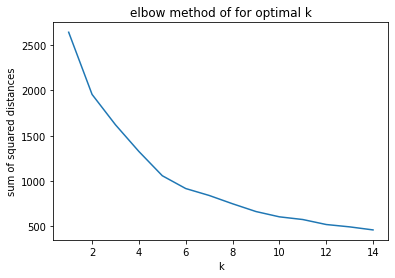

In [7]:
# Elbow plot to determine the best k value
plt.plot(k_values, sum_of_squared_dist)
plt.xlabel('k')
plt.ylabel('sum of squared distances')
plt.title('elbow method of for optimal k')
plt.show()

In [0]:
# From above fig we see thst distance starts to slow down after k=5